<a href="https://colab.research.google.com/github/SalmaSalahEldin/Stochastic_markov-chain/blob/main/sprintsNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#manipulation, cleaning and visualization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import warnings
import os
#Feature Selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df = pd.read_csv('/content/drive/MyDrive/forestfires.csv')

In [28]:
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [29]:
df.shape

(517, 13)

In [30]:
# Calculate the number of unique values in each column
unique_counts = df.nunique()

# Print the number of unique values for each column
print(unique_counts)

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64


In [31]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**We don't need to handle missing data because there is no missing**

**We need to encode 'month' and 'day' before applying our model**

In [33]:
#Shuffling rows
df = df.sample(frac=1, random_state=42)  # Setting random_state for reproducibility

In [34]:
#show duplicated rows and data after removing duplicates

# Check for duplicates
duplicates = df[df.duplicated(keep=False)]

if not duplicates.empty:
    print("Duplicated Rows:")
    print(duplicates)
else:
    print("No duplicated rows found.")

# Remove duplicates and keep the first occurrence
df = df.drop_duplicates()

print("\nDataFrame after removing duplicates:")
df

Duplicated Rows:
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
302  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
52   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
99   3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
214  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66

DataFrame after removing duplicates:


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
304,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
441,8,6,aug,mon,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0,1.23
153,5,4,sep,fri,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46
503,2,4,aug,wed,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4,5,sep,fri,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,0.00
106,4,5,mar,thu,91.4,30.7,74.3,7.5,18.2,29,3.1,0.0,0.00
270,2,2,aug,tue,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,0.52
435,2,5,jul,sat,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00


In [35]:
months = df['month'].unique()
months

array(['may', 'aug', 'sep', 'mar', 'jul', 'dec', 'feb', 'jun', 'apr',
       'oct', 'jan', 'nov'], dtype=object)

In [36]:
days = df['day'].unique()
days

array(['sat', 'tue', 'mon', 'fri', 'wed', 'sun', 'thu'], dtype=object)

In [37]:
# Convert data to DataFrame
df = pd.DataFrame(df)

# Initialize label encoders
month_encoder = LabelEncoder()
day_encoder = LabelEncoder()

# Fit and transform the data
df['encoded_month'] = month_encoder.fit_transform(df['month'])
df['encoded_day'] = day_encoder.fit_transform(df['day'])

# Create a combined feature (The formula encoded_month * (max_encoded_day + 1) + encoded_day ensures unique values by effectively creating a unique mapping of each combination of 'month' and 'day' to a single integer value.)
max_encoded_day = df['encoded_day'].max()
df['combined_encoded'] = df['encoded_month'] * (max_encoded_day + 1) + df['encoded_day']

df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,encoded_month,encoded_day,combined_encoded
304,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00,8,2,58
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,1,5,12
441,8,6,aug,mon,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0,1.23,1,1,8
153,5,4,sep,fri,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46,11,0,77
503,2,4,aug,wed,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95,1,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4,5,sep,fri,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,0.00,11,0,77
106,4,5,mar,thu,91.4,30.7,74.3,7.5,18.2,29,3.1,0.0,0.00,7,4,53
270,2,2,aug,tue,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,0.52,1,5,12
435,2,5,jul,sat,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00,5,2,37


In [38]:
# Drop the encoded_month and encoded_day columns
df = df.drop(columns=['encoded_month', 'encoded_day','month','day'])

# Print the DataFrame with the combined encoded feature
df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,combined_encoded
304,6,5,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00,58
501,7,5,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,12
441,8,6,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0,1.23,8
153,5,4,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46,77
503,2,4,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95,13
...,...,...,...,...,...,...,...,...,...,...,...,...
71,4,5,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,0.00,77
106,4,5,91.4,30.7,74.3,7.5,18.2,29,3.1,0.0,0.00,53
270,2,2,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,0.52,12
435,2,5,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00,37


In [39]:
# I want to move the column at index -2 to the last column (index -1)

# Get the column names
column_names = df.columns.tolist()

# Remove the column at index -2
column_to_move = column_names.pop(-2)

# Add the removed column at the last index
column_names.append(column_to_move)

# Reorder the columns in the DataFrame
df = df[column_names]

# Now, the column at index -2 is the last column in the DataFrame

In [40]:
df.corr(method='pearson')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,combined_encoded,area
X,1.000000,0.542705,-0.020499,-0.048861,-0.088801,0.006033,-0.051070,0.083757,0.020869,0.065176,-0.020071,0.062930
Y,0.542705,1.000000,-0.045979,0.008210,-0.098496,-0.023142,-0.023871,0.062587,-0.019537,0.033313,-0.063382,0.045168
FFMC,-0.020499,-0.045979,1.000000,0.383641,0.332936,0.532083,0.431609,-0.300827,-0.029208,0.056806,-0.002245,0.040232
DMC,-0.048861,0.008210,0.383641,1.000000,0.681741,0.304585,0.469590,0.071711,-0.105111,0.074780,-0.169044,0.073783
DC,-0.088801,-0.098496,0.332936,0.681741,1.000000,0.228168,0.497584,-0.044067,-0.203010,0.035690,0.228651,0.050313
ISI,0.006033,-0.023142,0.532083,0.304585,0.228168,1.000000,0.394217,-0.133363,0.106825,0.067664,-0.165276,0.008411
temp,-0.051070,-0.023871,0.431609,0.469590,0.497584,0.394217,1.000000,-0.528670,-0.227618,0.069526,-0.064096,0.098222
RH,0.083757,0.062587,-0.300827,0.071711,-0.044067,-0.133363,-0.528670,1.000000,0.071433,0.099616,-0.110226,-0.075460
wind,0.020869,-0.019537,-0.029208,-0.105111,-0.203010,0.106825,-0.227618,0.071433,1.000000,0.061479,-0.142507,0.012699
rain,0.065176,0.033313,0.056806,0.074780,0.035690,0.067664,0.069526,0.099616,0.061479,1.000000,-0.074461,-0.007418


**we can notice that temp and DMC have the highest corr**

In [41]:
df.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'combined_encoded', 'area'],
      dtype='object')

<ipython-input-42-11a3d5538c34>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['X'], color='orange')
<ipython-input-42-11a3d5538c34>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Y'], color='#577AFF')
<ipython-input-42-11a3d5538c34>:17: UserWarning: 

`distplot` is a deprecated func

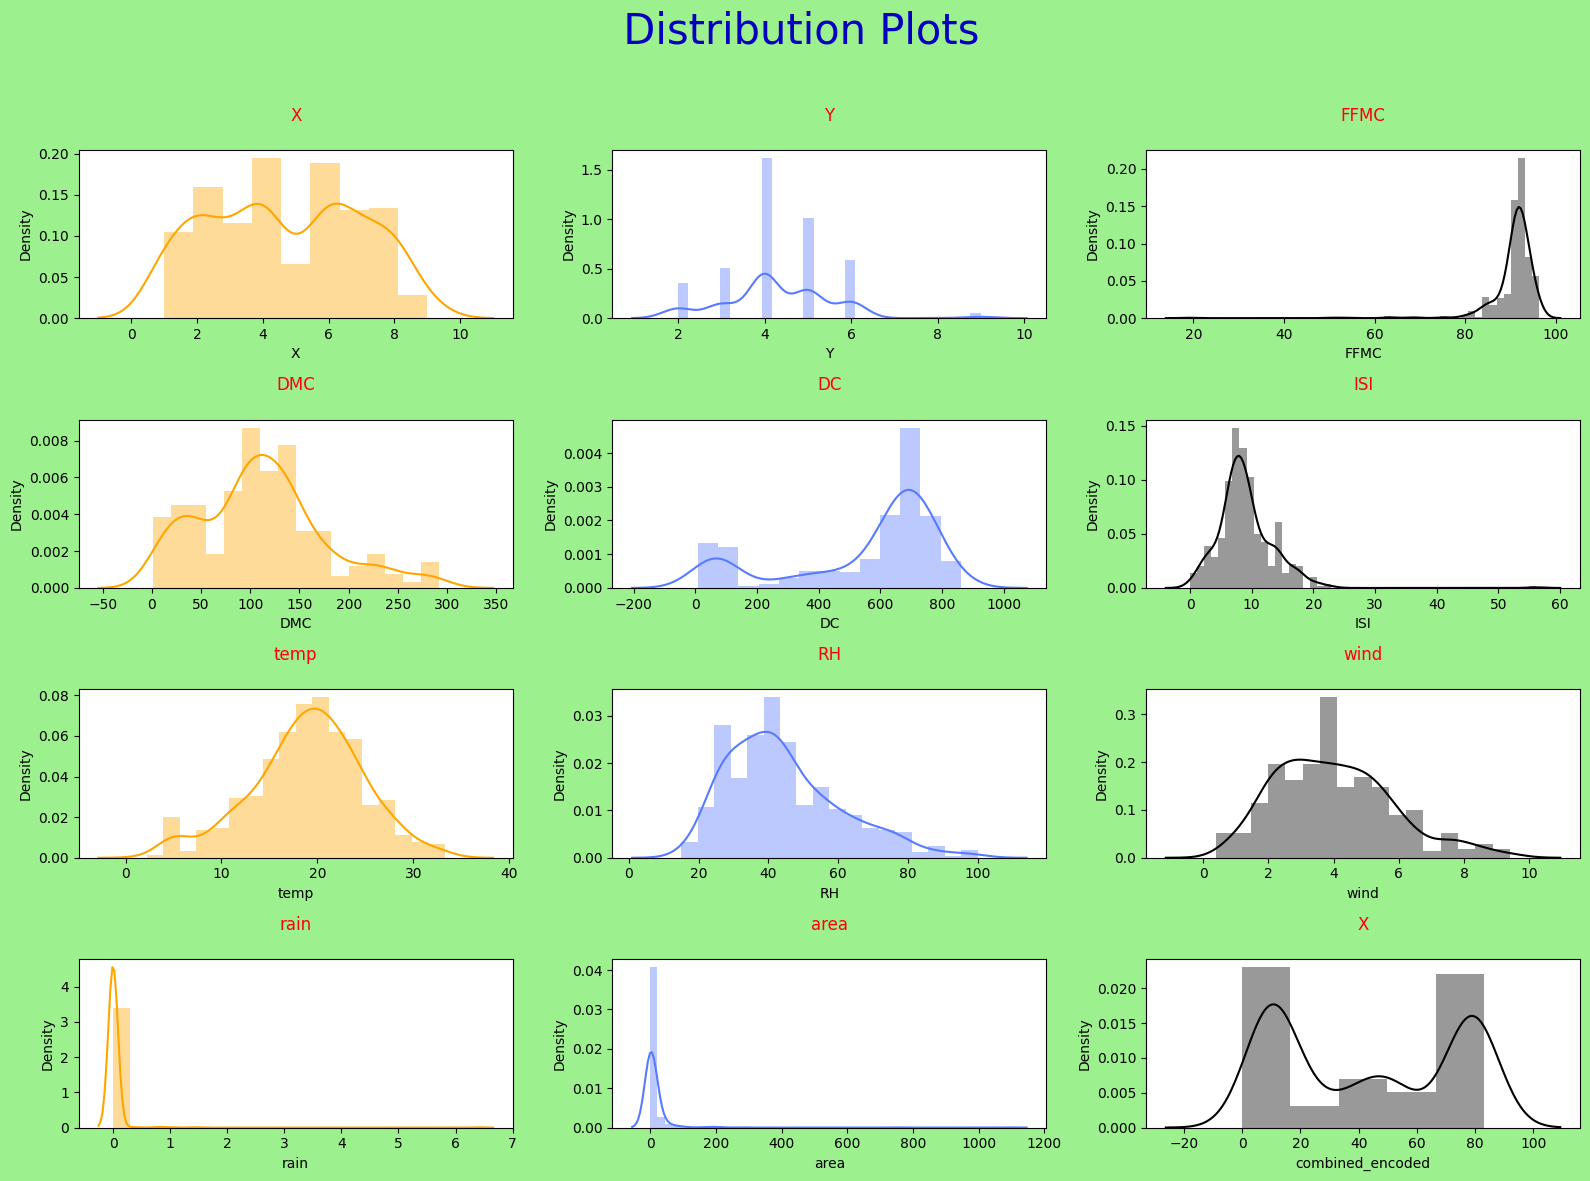

In [42]:
# to check the -Feature's Distributions- to check if they need to be normalized or not
plt.figure(figsize=(16,12),facecolor='#9DF08E')

#X
plt.subplot(4,3,1)
plt.title('X\n', color='#FF000B')
sns.distplot(df['X'], color='orange')

#Y
plt.subplot(4,3,2)
plt.title('Y\n', color='#FF000B')
sns.distplot(df['Y'], color='#577AFF')

#FFMC
plt.subplot(4,3,3)
plt.title('FFMC\n', color='#FF000B')
sns.distplot(df['FFMC'], color='black')

#DMC
plt.subplot(4,3,4)
plt.title('DMC\n', color='#FF000B')
sns.distplot(df['DMC'], color='orange')

#DC
plt.subplot(4,3,5)
plt.title('DC\n', color='#FF000B')
sns.distplot(df['DC'], color='#577AFF')

#ISI
plt.subplot(4,3,6)
plt.title('ISI\n', color='#FF000B')
sns.distplot(df['ISI'], color='black')

#temp
plt.subplot(4,3,7)
plt.title('temp\n', color='#FF000B')
sns.distplot(df['temp'], color='orange')

#RH
plt.subplot(4,3,8)
plt.title('RH\n', color='#FF000B')
sns.distplot(df['RH'], color='#577AFF')

#wind
plt.subplot(4,3,9)
plt.title('wind\n', color='#FF000B')
sns.distplot(df['wind'], color='black')

#rain
plt.subplot(4,3,10)
plt.title('rain\n', color='#FF000B')
sns.distplot(df['rain'], color='orange')

#area
plt.subplot(4,3,11)
plt.title('area\n', color='#FF000B')
sns.distplot(df['area'], color='#577AFF')

#combined_encoded
plt.subplot(4,3,12)
plt.title('X\n', color='#FF000B')
sns.distplot(df['combined_encoded'], color='black')


plt.suptitle(' Distribution Plots\n', color='#0000C1', size = 30)
plt.tight_layout()

**We need to apply normalization and transformation**

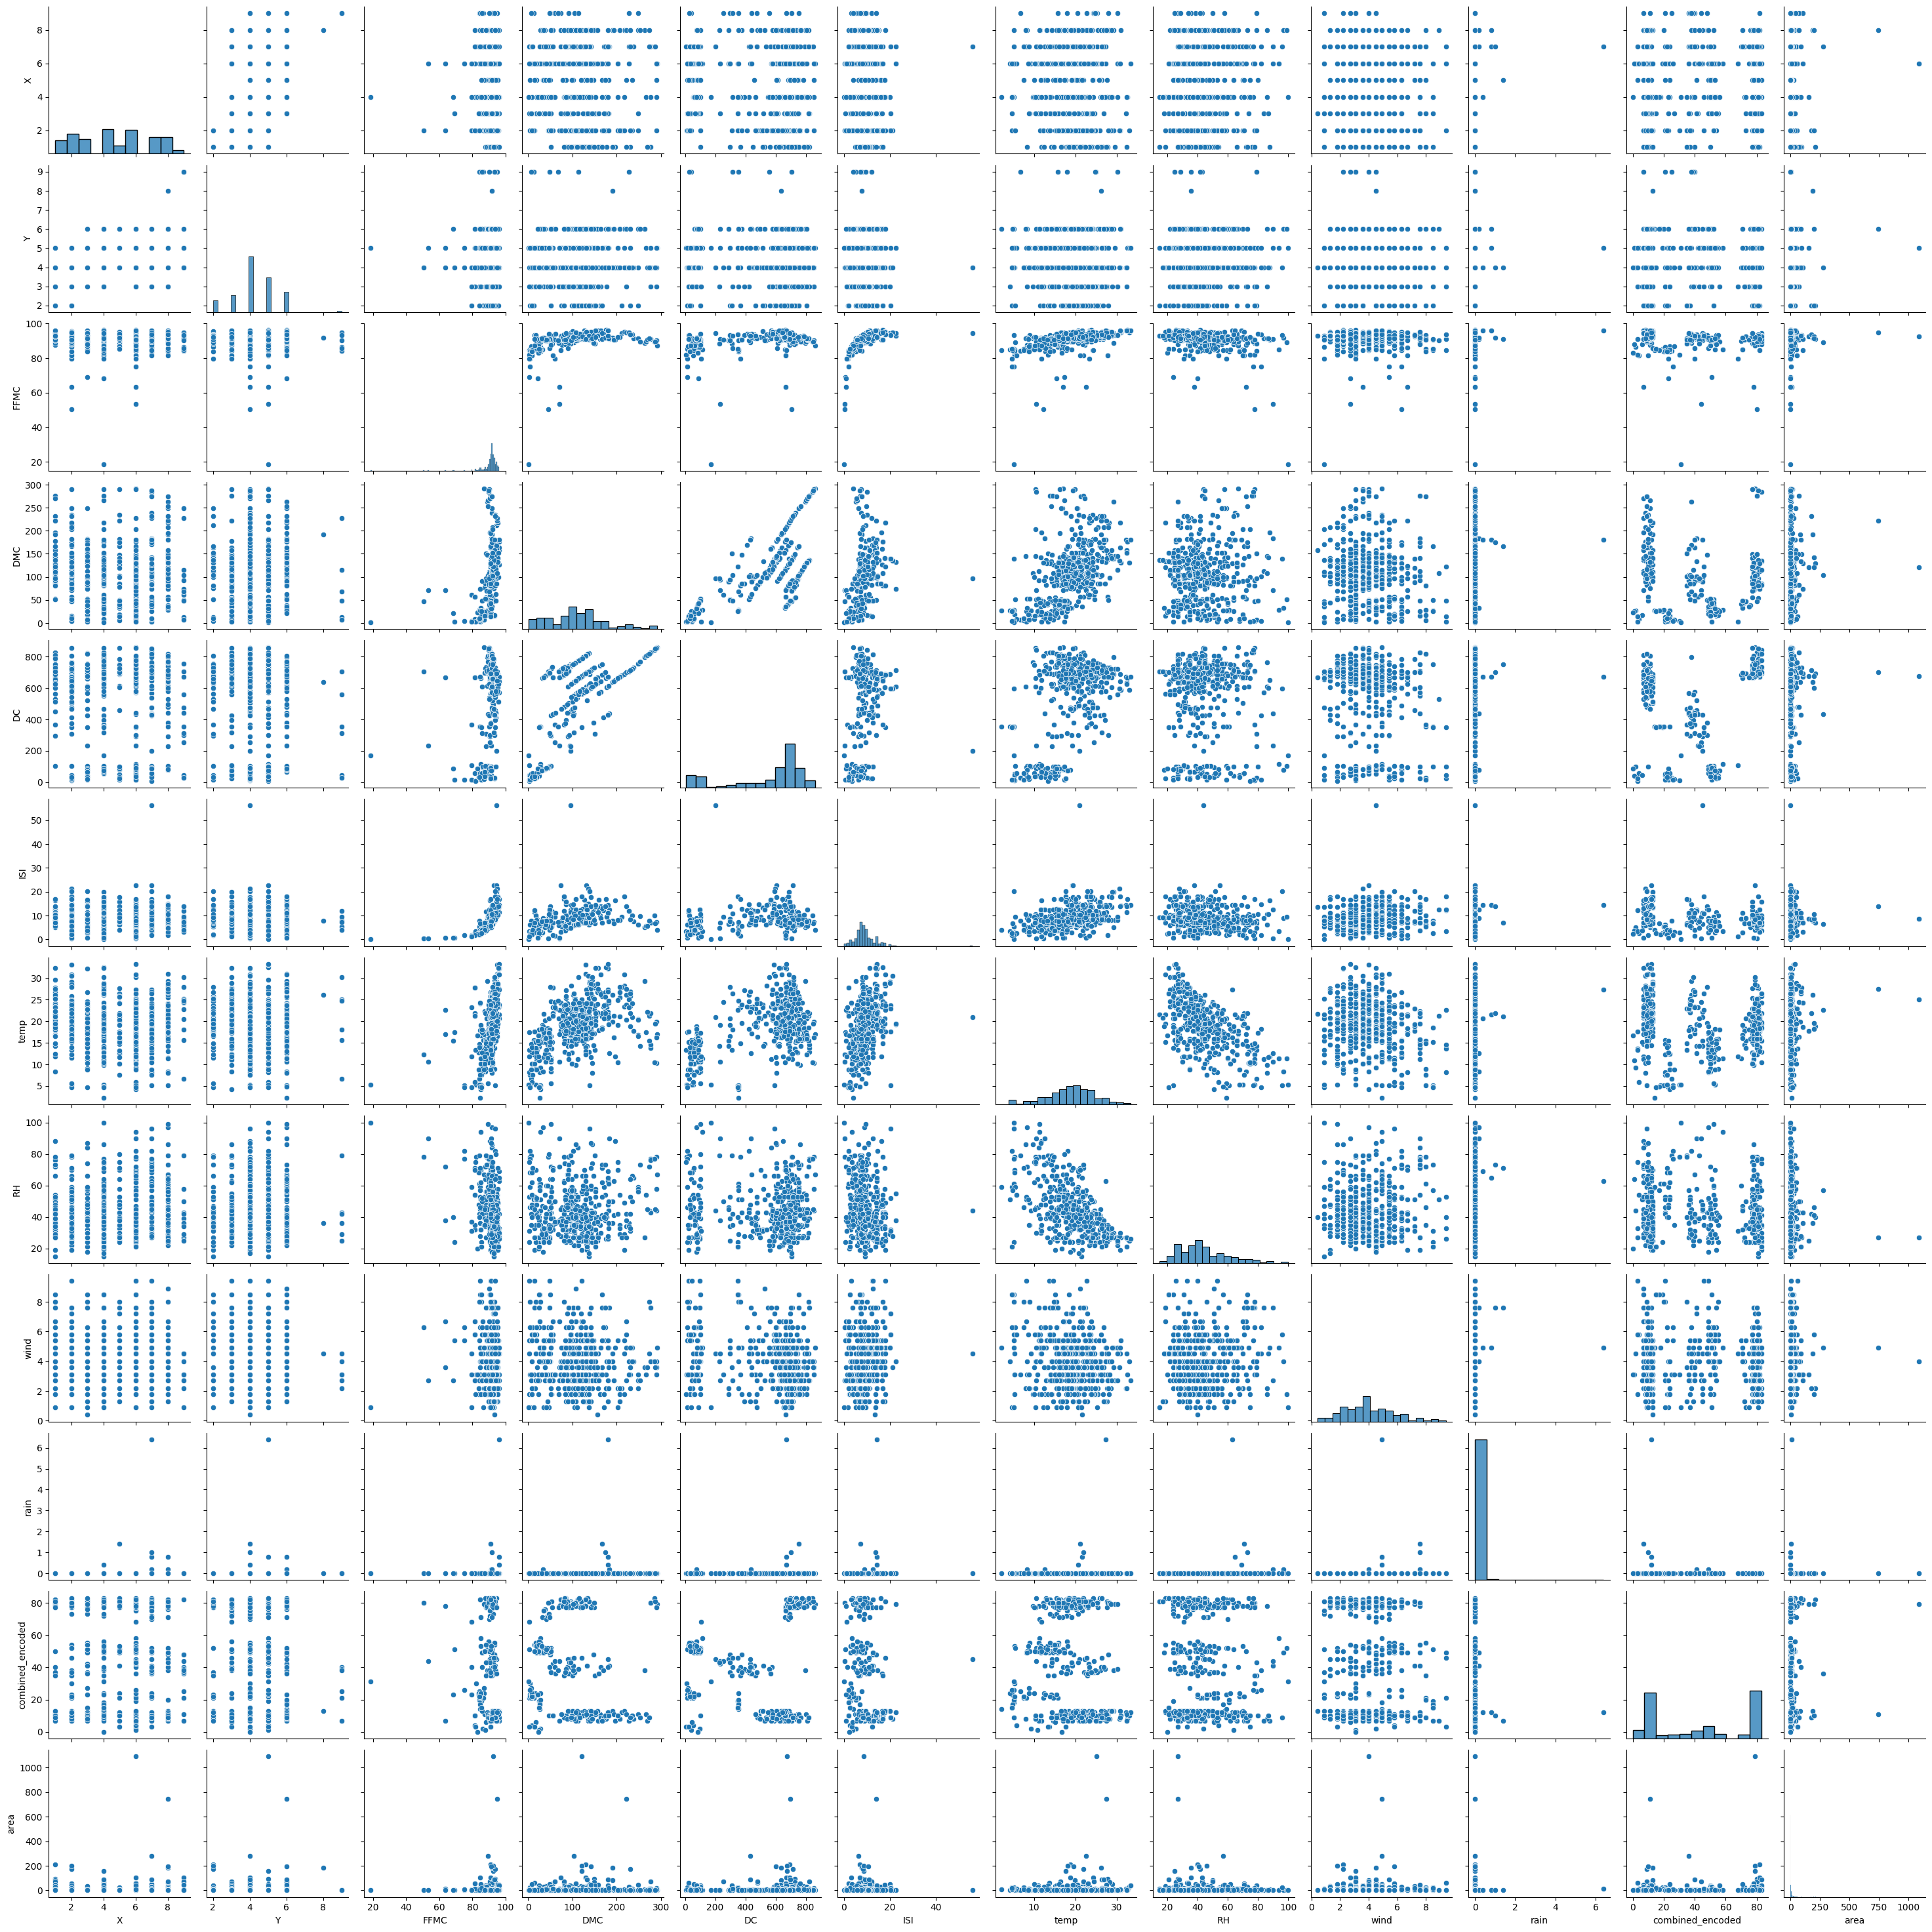

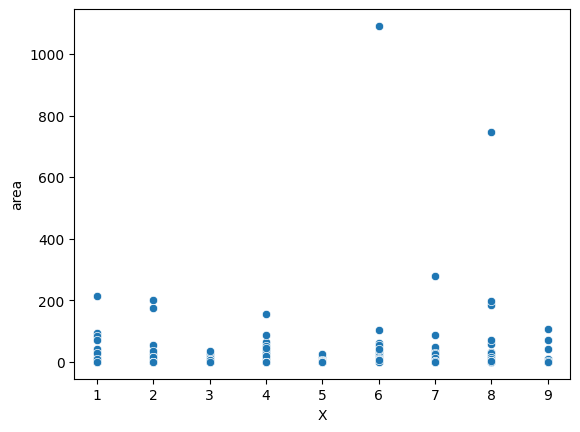

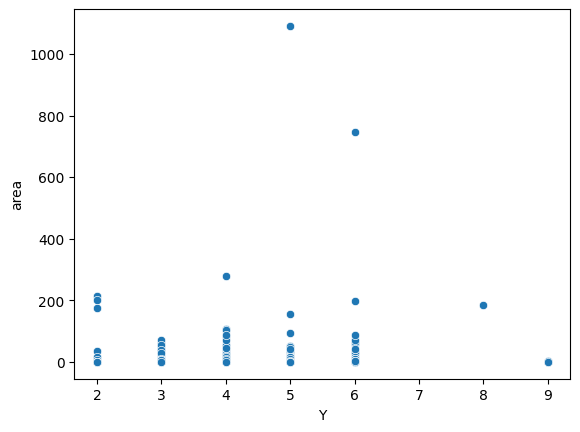

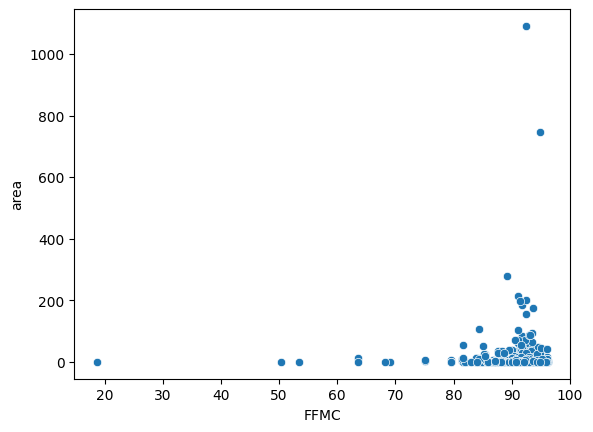

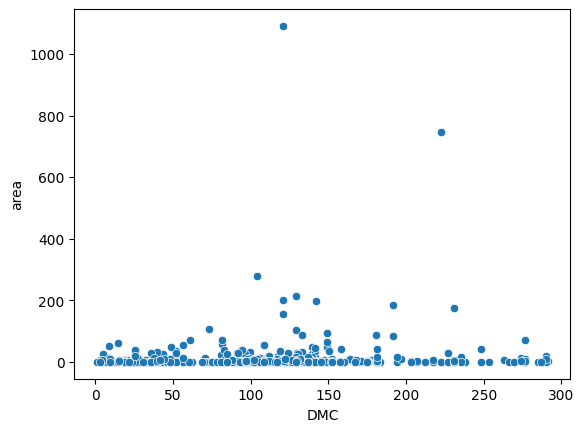

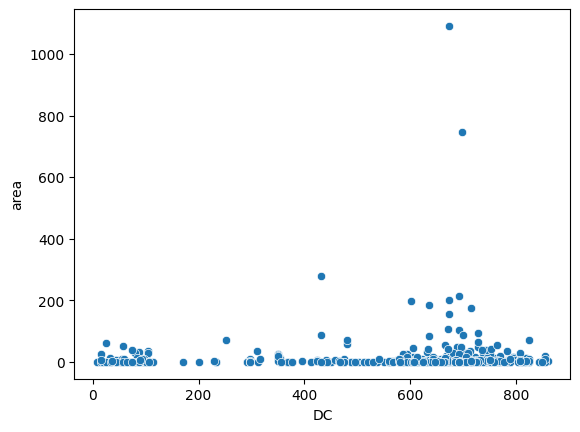

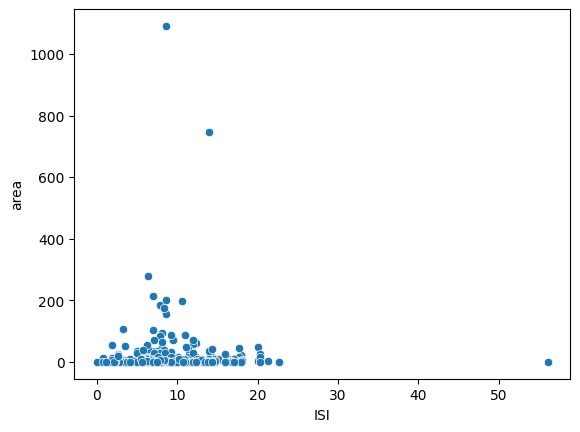

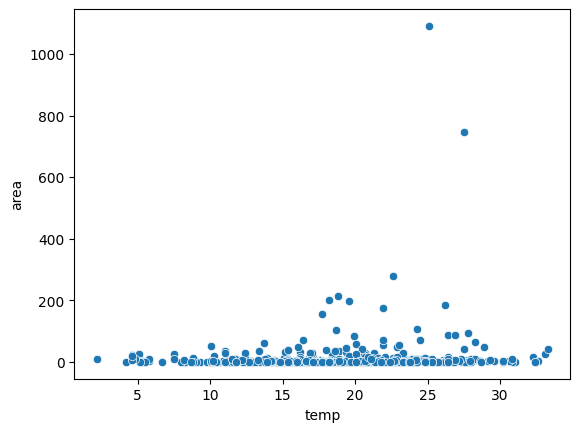

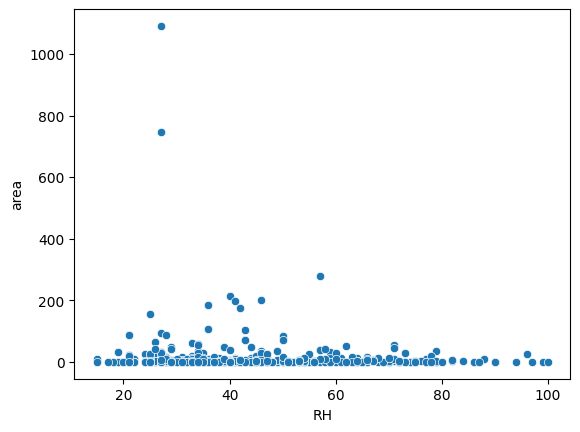

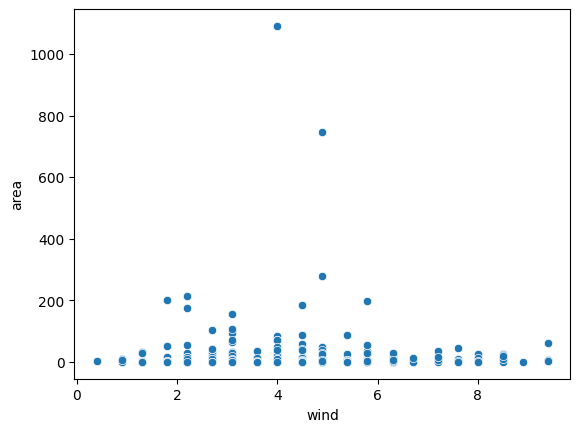

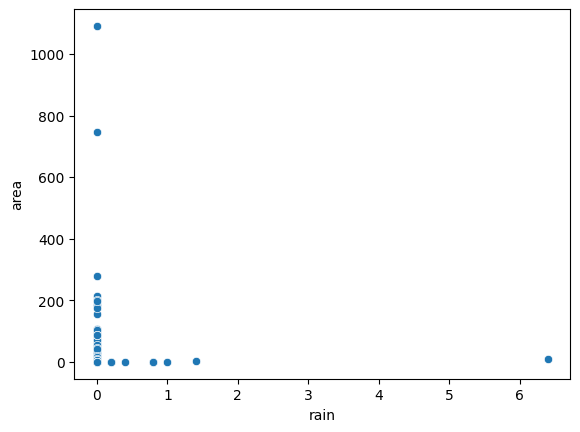

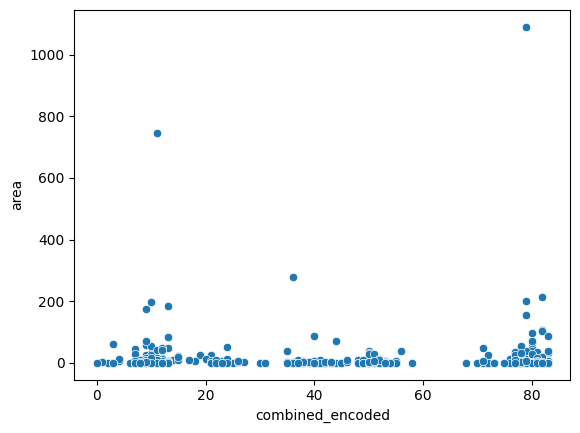

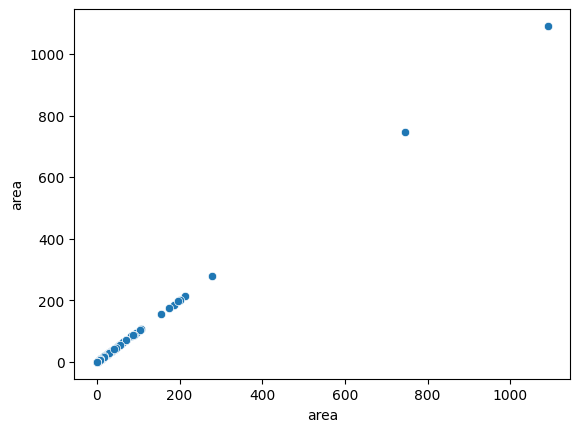

In [43]:
# Pairwise scatter plots for numeric features
sns.pairplot(df)
plt.show()

# Scatter plots for numeric features against the target variable
for feature in df:
    sns.scatterplot(data=df, x=feature, y="area")
    plt.show()

**For better understanding the relationships between all features**

[Text(0, 0, 'X'),
 Text(0, 1, 'Y'),
 Text(0, 2, 'FFMC'),
 Text(0, 3, 'DMC'),
 Text(0, 4, 'DC'),
 Text(0, 5, 'ISI'),
 Text(0, 6, 'temp'),
 Text(0, 7, 'RH'),
 Text(0, 8, 'wind'),
 Text(0, 9, 'rain'),
 Text(0, 10, 'combined_encoded'),
 Text(0, 11, 'area')]

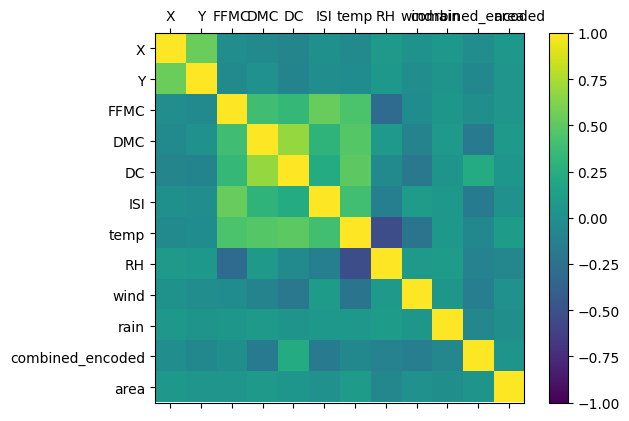

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

**For better understanding the correlations between all features**

In [45]:
from sklearn.preprocessing import StandardScaler

#Normalize these features
cols_to_norm = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'combined_encoded']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Apply log transformation to all features
log_transformed_df = np.log1p(df)

# Split data into features (X) and target (y)
X = log_transformed_df.drop('area', axis=1)
y = log_transformed_df['area']

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the log-transformed training data
scaler.fit(X_train)

# Apply scaling to all sets
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Apply scaling**

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Set a threshold for feature importance (you can adjust this value)
importance_threshold = 0.01

# Identify unimportant features based on the threshold
unimportant_feature_indices = np.where(feature_importances < importance_threshold)[0]

# Drop unimportant features from the dataset
selected_feature_indices = np.where(feature_importances >= importance_threshold)[0]
X_train = X_train[:, selected_feature_indices]
X_val = X_val[:, selected_feature_indices]
X_test = X_test[:, selected_feature_indices]

# Convert selected feature arrays back to DataFrames
X_train = pd.DataFrame(X_train, columns=[X.columns[i] for i in selected_feature_indices])
X_val = pd.DataFrame(X_val, columns=[X.columns[i] for i in selected_feature_indices])
X_test = pd.DataFrame(X_test, columns=[X.columns[i] for i in selected_feature_indices])

**Apply Feature Selection**

In [47]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, y)

    predictions = model.predict(X)

    # Evaluate the model
    score = explained_variance_score(y, predictions)
    mae = mean_absolute_error(predictions, y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)

    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.026303 (0.015549)
Ridge: 0.025358 (0.015303)
Lasso: 0.000000 (0.014993)
ElasticNet: 0.000000 (0.014993)
Bag_Re: 0.753808 (0.007014)
RandomForest: 0.831603 (0.006755)
ExtraTreesRegressor: 0.999824 (0.000088)
KNN: 0.077775 (0.014845)
CART: 0.999824 (0.000088)
SVM: -0.003711 (0.072054)


**calculate score and MAE for each model**

**'ExtraTreesRegressor' and 'DecisionTreeRegressor' are the best estimators/models for this dataset, followed by 'BaggingRegressor', ey can be further explored and their hyperparameters tuned**

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense


# Define the Keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2


#This helps prevent overfitting by discouraging large weights in the model. Regularization can help improve the generalization ability of the model.
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1))

from keras.optimizers import Adam

learning_rate = 0.001  # Your desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the custom learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Lists to store metrics for each epoch
train_rmse = []
val_rmse = []
test_rmse = []
train_mae = []
val_mae = []
test_mae = []
train_r2 = []
val_r2 = []
test_r2 = []

# Train the model
epochs = 50
batch_size = 32

for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)

    # Calculate metrics for training data
    y_train_pred = model.predict(X_train)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))

    # Calculate metrics for validation data
    y_val_pred = model.predict(X_val)
    val_rmse.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    val_mae.append(mean_absolute_error(y_val, y_val_pred))
    val_r2.append(r2_score(y_val, y_val_pred))

    # Calculate metrics for test data
    y_test_pred = model.predict(X_test)
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

    # Print metrics for this epoch
    print(f"Epoch {epoch + 1}/{epochs} - "
          f"Train RMSE: {train_rmse[-1]:.4f} - Val RMSE: {val_rmse[-1]:.4f} - Test RMSE: {test_rmse[-1]:.4f} - "
          f"Train MAE: {train_mae[-1]:.4f} - Val MAE: {val_mae[-1]:.4f} - Test MAE: {test_mae[-1]:.4f} - "
          f"Train R²: {train_r2[-1]:.4f} - Val R²: {val_r2[-1]:.4f} - Test R²: {test_r2[-1]:.4f}")

print("Final Metrics:")
print(f"Train RMSE: {train_rmse[-1]:.4f} - Val RMSE: {val_rmse[-1]:.4f} - Test RMSE: {test_rmse[-1]:.4f}")
print(f"Train MAE: {train_mae[-1]:.4f} - Val MAE: {val_mae[-1]:.4f} - Test MAE: {test_mae[-1]:.4f}")
print(f"Train R²: {train_r2[-1]:.4f} - Val R²: {val_r2[-1]:.4f} - Test R²: {test_r2[-1]:.4f}")


3/3 [==============================] - 0s 3ms/step
Epoch 1/50 - Train RMSE: 0.0756 - Val RMSE: 0.0787 - Test RMSE: 0.0595 - Train MAE: 0.0521 - Val MAE: 0.0517 - Test MAE: 0.0461 - Train R²: -1.2431 - Val R²: -4.7902 - Test R²: -43.1623
3/3 [==============================] - 0s 4ms/step
Epoch 2/50 - Train RMSE: 0.0648 - Val RMSE: 0.0658 - Test RMSE: 0.0445 - Train MAE: 0.0398 - Val MAE: 0.0412 - Test MAE: 0.0349 - Train R²: -0.6449 - Val R²: -3.0428 - Test R²: -23.6592
3/3 [==============================] - 0s 3ms/step
Epoch 3/50 - Train RMSE: 0.0603 - Val RMSE: 0.0577 - Test RMSE: 0.0384 - Train MAE: 0.0366 - Val MAE: 0.0390 - Test MAE: 0.0321 - Train R²: -0.4237 - Val R²: -2.1083 - Test R²: -17.4014
3/3 [==============================] - 0s 4ms/step
Epoch 4/50 - Train RMSE: 0.0563 - Val RMSE: 0.0520 - Test RMSE: 0.0315 - Train MAE: 0.0299 - Val MAE: 0.0321 - Test MAE: 0.0251 - Train R²: -0.2443 - Val R²: -1.5243 - Test R²: -11.4086
3/3 [==============================] - 0s 4ms/step
E

**The test RMSE is the lowest among the three, indicating that the model performs relatively better on unseen data.**

**The test MAE is also the lowest, suggesting better accuracy on unseen data.**

**The negative R² values for test datasets indicate that the model does not fit the data well and performs worse than a horizontal line.**